# Run A Mixed Effects Model

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to assess if a predictors relationship to the predictee is different between two groups. 

Notes:
- To best use this notebook, you should be familar with mixed effects models

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [1]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/cognition_2023/metadata/master_list_proper_subjects.xlsx'

In [2]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/cognition_2023/revisions/stripplot_of_outcomes'

In [3]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet='master_list_proper_subjects')
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [4]:
data_df.columns

Index(['subject', 'Age', 'Hippocampus_GM_Vol', 'Parahippocampal_Gyrus_GM_Vol',
       'Entorhinal_Cortex_GM_Vol', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T_Redone',
       'Subiculum_Connectivity_T', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 

In [5]:
drop_list = ['Percent_Cognitive_Improvement']

In [6]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,subject,Age,Hippocampus_GM_Vol,Parahippocampal_Gyrus_GM_Vol,Entorhinal_Cortex_GM_Vol,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,...,DECLINE,Cognitive_Improve,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,5.8883,4.5970,2.4587,-0.392857,0.314066,0.314066,-21.428571,-1.282630,...,1.0,No,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,3.7634,3.9036,2.2905,-0.666667,0.013999,0.013999,-36.363636,-1.760917,...,1.0,No,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,4.8575,4.8177,3.1596,-1.447368,-0.841572,-0.841572,-78.947368,-0.595369,...,1.0,No,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,4.8569,4.8655,2.6641,-2.372549,-1.855477,-1.855477,-129.411765,-0.945206,...,1.0,No,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,5.9636,4.8434,3.3463,-0.192982,0.533109,0.533109,-10.526316,-1.151973,...,0.0,No,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,86,57.0,NaN,NaN,NaN,NaN,0.598787,-0.099428,0.000000,-0.087220,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,87,65.0,NaN,NaN,NaN,NaN,0.598787,-0.099428,0.000000,0.598397,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,88,65.0,NaN,NaN,NaN,NaN,5.854050,2.637141,15.384615,0.269872,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,89,67.0,NaN,NaN,NaN,NaN,0.598787,-0.099428,0.000000,-0.158639,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [7]:
data_df.columns

Index(['subject', 'Age', 'Hippocampus_GM_Vol', 'Parahippocampal_Gyrus_GM_Vol',
       'Entorhinal_Cortex_GM_Vol', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T_Redone',
       'Subiculum_Connectivity_T', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 

Set the parameters for dropping rows

In [8]:
column = 'City'  # The column you'd like to evaluate
condition = 'not'  # The condition to check ('equal', 'above', 'below')
value = 'Toronto'  # The value to compare against

In [9]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

,subject,Age,Hippocampus_GM_Vol,Parahippocampal_Gyrus_GM_Vol,Entorhinal_Cortex_GM_Vol,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,...,DECLINE,Cognitive_Improve,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,5.8883,4.5970,2.4587,-0.392857,0.314066,0.314066,-21.428571,-1.282630,...,1.0,No,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,3.7634,3.9036,2.2905,-0.666667,0.013999,0.013999,-36.363636,-1.760917,...,1.0,No,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,4.8575,4.8177,3.1596,-1.447368,-0.841572,-0.841572,-78.947368,-0.595369,...,1.0,No,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,4.8569,4.8655,2.6641,-2.372549,-1.855477,-1.855477,-129.411765,-0.945206,...,1.0,No,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,5.9636,4.8434,3.3463,-0.192982,0.533109,0.533109,-10.526316,-1.151973,...,0.0,No,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
5,106,66.0,5.0476,4.9223,2.8478,-0.705128,-0.028151,-0.028151,-38.461538,-0.489205,...,1.0,No,-1.114269,1.114269,0.12,0.88,15.816634,17.617107,-0.597423,-0.388183
6,107,64.0,4.0586,4.2483,2.4046,-0.282051,0.435498,0.435498,-15.384615,-1.718309,...,0.0,No,-1.114269,1.114269,0.12,0.88,15.524025,13.452311,-0.688373,-1.507246
7,108,60.0,4.8265,4.0317,2.7601,-0.534722,0.158596,0.158596,-29.166667,-1.145694,...,1.0,No,0.816622,-0.816622,0.56,0.44,16.546984,13.932696,-0.370413,-1.378169
8,109,72.0,4.6904,3.9931,2.4961,-0.557971,0.133118,0.133118,-30.434783,-0.043697,...,1.0,No,0.641086,-0.641086,0.52,0.48,19.669539,21.341523,0.600149,0.612551
9,110,72.0,5.3981,5.3549,2.9588,-1.551282,-0.955451,-0.955451,-84.615385,0.240855,...,1.0,No,-1.114269,1.114269,0.12,0.88,18.295718,19.263977,0.173133,0.054323


**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [10]:
# Remove anything you don't want to standardize
# cols_not_to_standardize = ['Age']

In [11]:
# data_df = cal_palm.standardize_columns(cols_not_to_standardize)
# data_df

Descriptive Stats

In [12]:
data_df.describe()

,subject,Age,Hippocampus_GM_Vol,Parahippocampal_Gyrus_GM_Vol,Entorhinal_Cortex_GM_Vol,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,...,IMPROVE,DECLINE,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,4.600000e+01,4.600000e+01,46.000000,4.600000e+01,...,46.000000,46.000000,4.600000e+01,4.600000e+01,46.000000,46.000000,46.000000,46.000000,4.600000e+01,4.600000e+01
mean,125.608696,66.891304,4.934713,4.719733,2.998220,-0.679440,2.173916e-11,2.173916e-11,-37.060379,9.654113e-18,...,0.086957,0.608696,2.173911e-11,-2.173911e-11,0.373913,0.626087,17.738702,19.061803,-8.695653e-11,-6.521738e-11
std,14.910814,8.000634,0.904774,0.682354,0.646760,0.912493,1.000000e+00,1.000000e+00,49.772318,1.000000e+00,...,0.284885,0.493435,1.000000e+00,1.000000e+00,0.227874,0.227874,3.217265,3.721683,1.000000e+00,1.000000e+00
min,101.000000,47.000000,2.409900,3.061000,1.443900,-3.807692,-3.428250e+00,-3.428250e+00,-207.692308,-2.576474e+00,...,0.000000,0.000000,-1.640876e+00,-2.747514e+00,0.000000,0.000000,10.126563,9.630690,-2.366028e+00,-2.534098e+00
25%,113.250000,61.250000,4.276025,4.255200,2.455325,-1.121154,-4.840736e-01,-4.840736e-01,-61.153846,-6.559694e-01,...,0.000000,0.000000,-5.876626e-01,-4.655509e-01,0.240000,0.520000,15.823044,16.457369,-5.954306e-01,-6.997999e-01
50%,125.500000,68.500000,4.915000,4.674250,2.968350,-0.546347,1.458573e-01,1.458573e-01,-29.800725,1.270997e-02,...,0.000000,1.000000,-1.488236e-01,1.488236e-01,0.340000,0.660000,17.594708,19.231010,-4.475662e-02,4.546524e-02
75%,138.750000,72.750000,5.356850,5.186925,3.357700,-0.081608,6.551640e-01,6.551640e-01,-4.451346,6.351224e-01,...,0.000000,1.000000,4.655509e-01,5.876626e-01,0.480000,0.760000,19.615475,21.284672,5.833443e-01,5.972752e-01
max,150.000000,79.000000,7.546900,6.450500,4.576500,1.000000,1.840498e+00,1.840498e+00,54.545455,2.183535e+00,...,1.000000,1.000000,2.747514e+00,1.640876e+00,1.000000,1.000000,24.418011,27.143129,2.076083e+00,2.171417e+00


# 02 Plot

In [13]:
import os
import seaborn as sns
def plot_group_values(df, group_col='Group', value_col='Value', jitter_range=(-0.01, 0.01), title="Value by Group", out_dir=None):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np

    # Map groups to numeric values and add jitter for strip effect
    group_mapping = {group: i for i, group in enumerate(sorted(df[group_col].unique()))}
    df['Group_num'] = df[group_col].map(group_mapping)
    df['Group_jitter'] = df['Group_num'] + np.random.uniform(jitter_range[0], jitter_range[1], size=len(df))

    # Create jointplot: main panel shows jittered points (acting as a strip plot),
    # while the margins display KDE distributions.
    g = sns.jointplot(
        data=df, 
        x="Group_jitter", 
        y=value_col, 
        hue=group_col, 
        kind="scatter", 
        height=6, 
        ratio=6
    )
    # Update x-axis: place ticks at the group centers and label them
    ticks = list(group_mapping.values())
    labels = list(group_mapping.keys())
    g.ax_joint.set_xticks(ticks)
    g.ax_joint.set_xticklabels(labels)

    # Set xlim if there is only one group
    if len(group_mapping) == 1:
        g.ax_joint.set_xlim(-0.2, 0.2)

    g.set_axis_labels(group_col, value_col)
    g.ax_joint.set_title(title, pad=80)
    if out_dir is not None: 
        os.makedirs(out_dir, exist_ok=True)
        plt.savefig(os.path.join(out_dir, f"{title}.svg"))
    plt.show()

In [14]:
data_df.columns

Index(['subject', 'Age', 'Hippocampus_GM_Vol', 'Parahippocampal_Gyrus_GM_Vol',
       'Entorhinal_Cortex_GM_Vol', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T_Redone',
       'Subiculum_Connectivity_T', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 

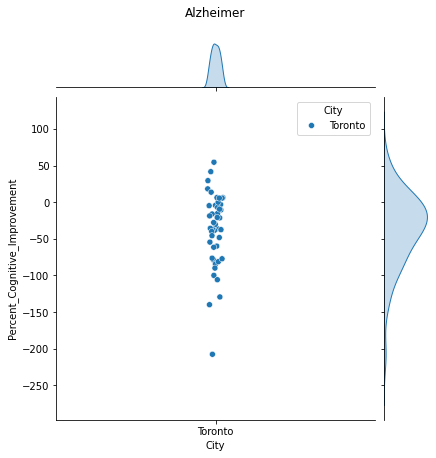

In [15]:
plot_group_values(df=data_df, group_col='City', value_col='Percent_Cognitive_Improvement', title="Alzheimer", out_dir=out_dir)
